In [1]:
# useful starting line 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


# Load Data

In [3]:
from leastSquares.helpers import load_data
from leastSquares.least_squares import least_squares
from linearRegression_gradientDescent import costs as cts
# load dataset
x, y = load_data()
print("shape of x {v}".format(v=x.shape))
print("shape of y {v}".format(v=y.shape))

shape of x (50,)
shape of y (50,)


# Bias-Variance decomposition

Implementing bias variance decomposition below:

In [4]:
from splitData.split import split_data
from leastSquares.build_polynomial import build_poly
from ridgeRegression.ridge_regression import ridge_regression
from plots import bias_variance_decomposition_visualization
import linearRegression_gradientDescent.costs as cts

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    mse_tr = np.empty((len(seeds), len(degrees)))
    mse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        # split data with a specific seed
        training, testing = split_data(x, y, ratio_train, seed=seed)
        
        # get train and test data
        x_train, y_train = training
        x_test, y_test = testing
            
        for index_degree, degree in enumerate(degrees):
            # augment feature space
            tx_train = build_poly(x_train, degree)
            tx_test = build_poly(x_test, degree)
            # find optimal solution (least squares)
            mse_tr_star, w_star = least_squares(y_train, tx_train)
            mse_te_star = cts.compute_mse(y_test, tx_test, w_star)
            # update
            mse_tr[index_seed][index_degree] = mse_tr_star
            mse_te[index_seed][index_degree] = mse_te_star
            
    return mse_tr, mse_te


mse_tr, mse_te = bias_variance_demo()

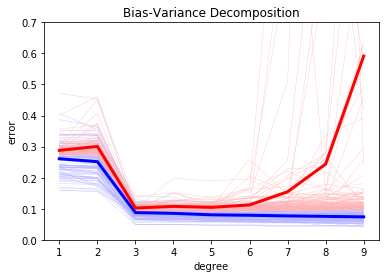

In [5]:
degrees = range(1, 10)
bias_variance_decomposition_visualization(degrees, mse_tr, mse_te)


Text(0, 0.5, 'test_error')

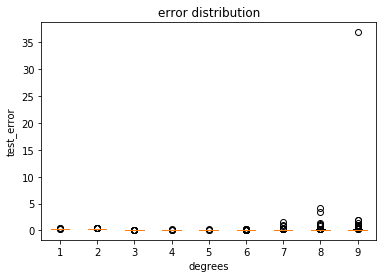

In [9]:
plt.boxplot(mse_te)

plt.title("error distribution")
plt.xlabel("degrees")
plt.ylabel("test_error")